In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind,f_oneway
import seaborn as sns


df = pd.read_csv("analysis_dataframe2.csv")
df.head()

,Unnamed: 0,Player,Tm,Pos,Age,MP,Team Performance,Team Performance (20),Season,Composite,ORtg,DRtg
0,0,Jason Terry,ATL,PG,22,1888,Average,bottom,1999-2000,0.209845,100.0,108.0
1,1,LaPhonso Ellis,ATL,PF,29,1309,Average,bottom,1999-2000,0.189767,103.0,108.0
2,2,Matt Maloney,ATL,PG,29,1403,Average,bottom,2000-2001,0.164912,100.0,107.0
3,3,DerMarr Johnson,ATL,SF,20,1313,Average,bottom,2000-2001,0.096842,88.0,106.0
4,4,Jacque Vaughn,ATL,PG,26,1856,Average,Average,2001-2002,0.199747,110.0,109.0


I took two players from each team, so technically they are like sixth and seventh men, but I will refer them to sixth men. I also had to manually remove some outliers because they were bugging my results. 

## Let's start with descriptive Stats

Average Age of Sixth Men: 26.352941176470587 | Average age in NBA : 26.18 


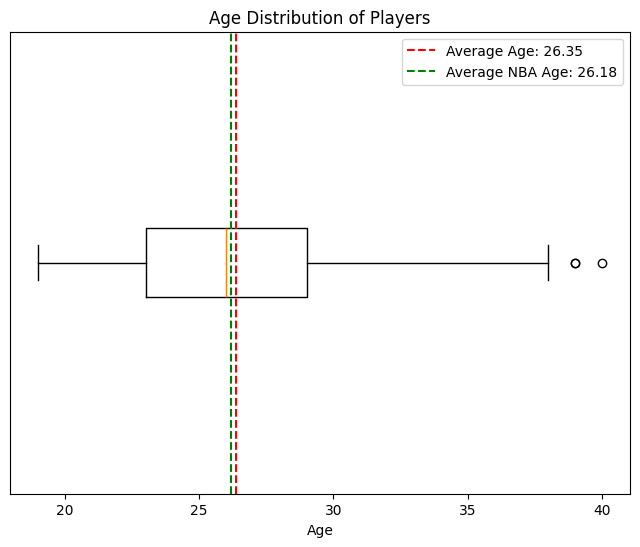

In [2]:
average_age = df.loc[:, 'Age'].mean() #calculating average
print(f"Average Age of Sixth Men: {average_age} | Average age in NBA : 26.18 ")

#box plot for visualizations
plt.figure(figsize=(8, 6))
plt.boxplot(df['Age'], vert=False)
plt.xlabel('Age')
plt.title('Age Distribution of Players')
plt.yticks([]) 
plt.axvline(x=average_age, color='r', linestyle='--', label=f'Average Age: {average_age:.2f}')
plt.axvline(x=26.18, color='g', linestyle='--', label='Average NBA Age: 26.18')
plt.legend()
#plt.savefig(f"visualization/descriptive_stats_visualized/age_distribution", bbox_inches='tight')  
plt.show()

The age if Sixth men is slightly greater, but no conclusions can be drawn. We will be exploring the age of sixth men more in depth later.

average PIE score of sixth man on top 4 team : 0.17128029240641215 | average PIE score of sixth man on average team : 0.18262931009546862 | average PIE score of sixth man on bottom 4 team : 0.19705700807143223
average PIE score of sixth man on top 6 team : 0.17261316111422714 | average PIE score of sixth man on average team : 0.1823477540344368 | average PIE score of sixth man on bottom 6 team : 0.19544757538400306
t-stat: -4.635939172154084 
 p-value: 4.63588161141245e-06


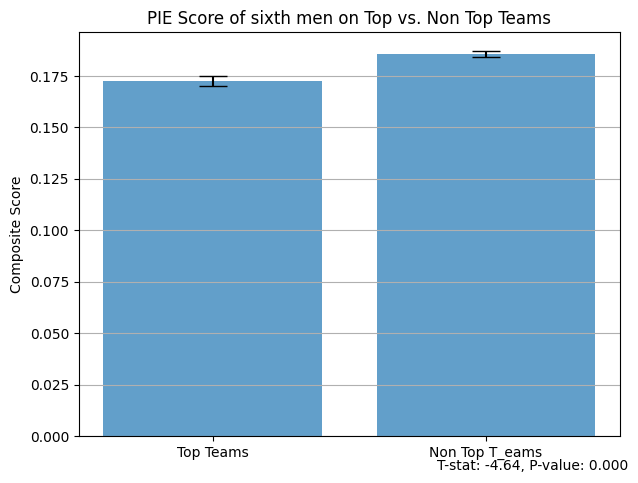

In [3]:
#grouping the different team performances 10 percentile
top_teams = df[df["Team Performance"] == "top"]
mid_teams = df[df["Team Performance"] == "Average"]
bottom_teams = df[df["Team Performance"] == "bottom"] 

#averaging the groups 10 percentile
averageTopPIE =  top_teams.loc[:, 'Composite'].mean() 
averagemidPIE = mid_teams.loc[:, 'Composite'].mean() 
averageBotPIE = bottom_teams.loc[:, 'Composite'].mean() 

#grouping the different team performances 10 percentile
top_teams_20 = df[df["Team Performance (20)"] == "top"]
mid_teams_20 = df[df["Team Performance (20)"] == "Average"]
bottom_teams_20 = df[df["Team Performance (20)"] == "bottom"] 

# Averaging the groups' 20 percentile
averageTopPIE_20 = top_teams_20['Composite'].mean() 
averageMidPIE_20 = mid_teams_20['Composite'].mean() 
averageBotPIE_20 = bottom_teams_20['Composite'].mean() 

print(f"average PIE score of sixth man on top 4 team : {averageTopPIE} | average PIE score of sixth man on average team : {averagemidPIE} | average PIE score of sixth man on bottom 4 team : {averageBotPIE}")
print(f"average PIE score of sixth man on top 6 team : {averageTopPIE_20} | average PIE score of sixth man on average team : {averageMidPIE_20} | average PIE score of sixth man on bottom 6 team : {averageBotPIE_20}")

grouped_10 = df.groupby('Team Performance')['Composite'].mean()
grouped_20 = df.groupby('Team Performance (20)')['Composite'].mean()

#column for top teams 
df['Is Top Team'] = df['Team Performance (20)'] == 'top'
df['Is Average Team'] = df['Team Performance (20)'] == 'Average'
df['Is Bottom Team'] = df['Team Performance (20)'] == 'bottom'


#getting top teams and non top teams
top_team_scores = df[df['Is Top Team']]['Composite']
non_top_team_scores = df[~df['Is Top Team']]['Composite']

#means + standard errors for the top and bottom teams
mean_top_20 = df[df["Is Top Team"]]['Composite'].mean()
non_top_sem_mean = df[~df["Is Top Team"]]['Composite'].mean()

top_sem = df[df["Is Top Team"]]['Composite'].sem()
non_top_sem = df[~df["Is Top Team"]]['Composite'].sem()

#t-test between top and bottom teams
t_stat, p_value_ttest = ttest_ind(top_team_scores, non_top_team_scores, equal_var=False)

print(f"t-stat: {t_stat} \n p-value: {p_value_ttest}")
#plotting
fig, ax = plt.subplots()
groups = ['Top Teams', 'Non Top T_eams']
means = [mean_top_20, non_top_sem_mean]
errors = [top_sem, non_top_sem]

ax.bar(groups, means, yerr=errors, align='center', alpha=0.7, ecolor='black', capsize=10)
ax.set_ylabel('Composite Score')
ax.set_title('PIE Score of sixth men on Top vs. Non Top Teams')
ax.yaxis.grid(True)

#add the t-statistic and p-value to the plot for easy reference
plt.figtext(0.99, 0.01, f'T-stat: {t_stat:.2f}, P-value: {p_value_ttest:.3f}', horizontalalignment='right')

#plt.savefig(f"visualization/descriptive_stats_visualized/t-test_PIE_vs_team_perf", bbox_inches='tight')  
plt.tight_layout()
plt.show()

this is very interesting because you'd think it would be the opposite. I think the reason top teams have sixth men with lower pie scores is because these bench players, while still very important, do not need to contribute as much statistically. They can focus on getting the team hyped or bring energy!

please note that these PIE scores might be different from other resources. However, after verification, the scores relative to each other are still accurate. 

Now we will be looking at the usage rate of these "sixth men" through the 2010s, and then through from 2010 - 2023. 

Averages by Season (1999-2010):
            AveragePIE  AverageORtg  AverageDRtg  Minutes Played        Age
Season                                                                    
1999-2000    0.184813   106.137931   104.534483     1708.017241  27.172414
2000-2001    0.177429   103.517241   103.586207     1756.500000  27.741379
2001-2002    0.184884   105.034483   104.620690     1750.655172  26.793103
2002-2003    0.179517   103.775862   103.741379     1727.637931  27.551724
2003-2004    0.166162   102.896552   103.844828     1664.086207  27.431034
2004-2005    0.181842   106.433333   106.383333     1608.633333  26.966667
2005-2006    0.175380   106.016667   106.816667     1707.550000  26.016667
2006-2007    0.182174   106.850000   107.100000     1740.233333  25.933333
2007-2008    0.177955   107.350000   108.100000     1781.150000  25.350000
2008-2009    0.174786   108.950000   108.983333     1729.650000  26.316667
2009-2010    0.191340   108.850000   108.033333     1716.016667  25

C:\Users\ieyua\AppData\Local\Temp\ipykernel_13688\778323761.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  averages_period1 = period1_df.groupby('Season').apply(calculate_averages)
C:\Users\ieyua\AppData\Local\Temp\ipykernel_13688\778323761.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  averages_period2 = period2_df.groupby('Season').apply(calculate_averages)


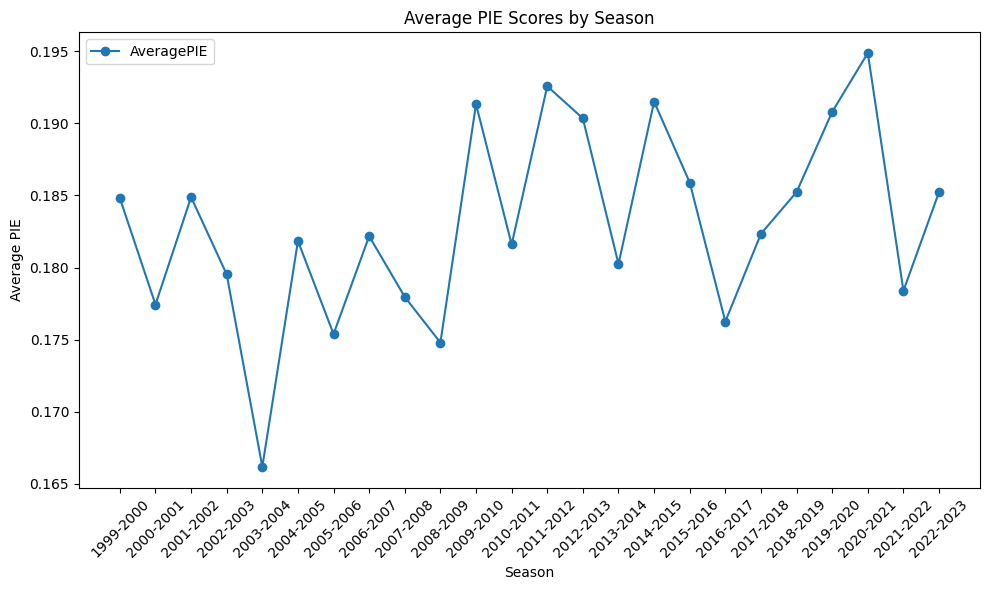

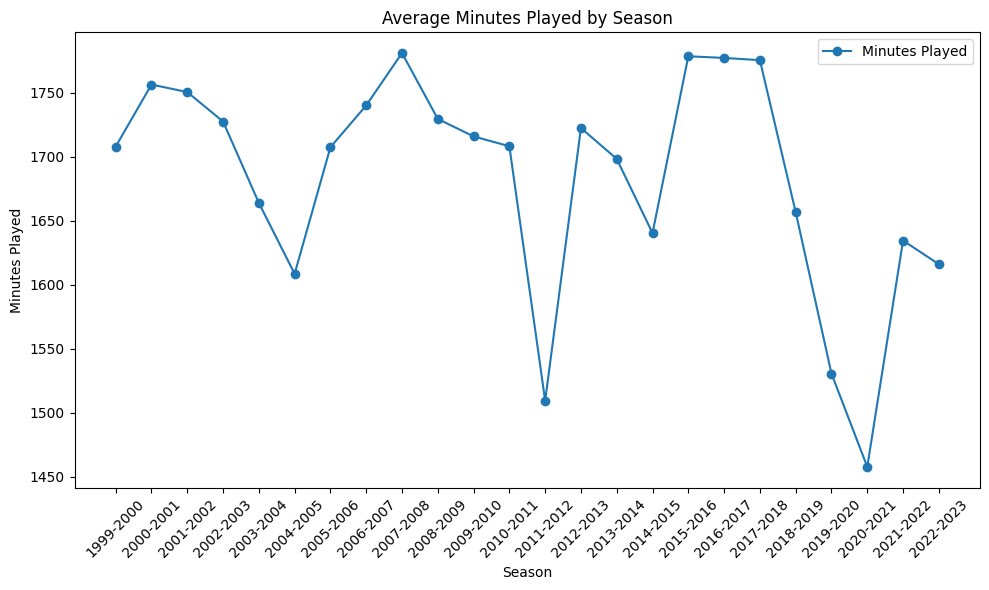

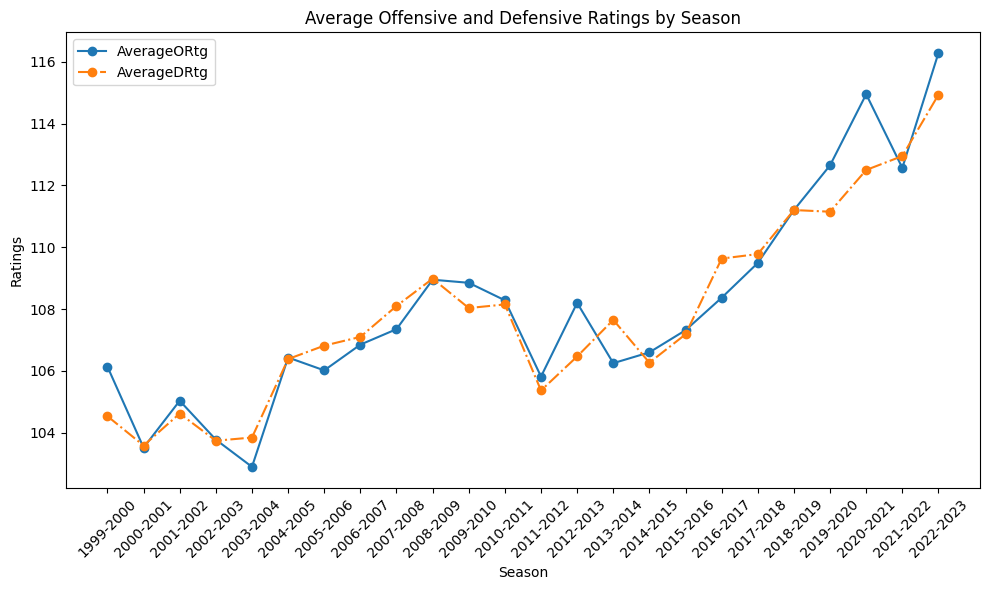

In [4]:
def get_start_year(season): #getting only the first year 
    start_year = int(season.split('-')[0])
    return start_year

df['StartYear'] = df['Season'].apply(get_start_year) 
#sorting the different times
period1_df = df[(df['StartYear'] >= 1999) & (df['StartYear'] <= 2010)]  
period2_df = df[(df['StartYear'] > 2010) & (df['StartYear'] <= 2023)]

def calculate_averages(group): #function for calculating averages 
    averages = {
        'AveragePIE': group['Composite'].mean(),
        'AverageORtg': group['ORtg'].mean(),
        'AverageDRtg': group['DRtg'].mean(), 
        'Minutes Played' : group["MP"].mean(),
        'Age' : group["Age"].mean()
    }
    return pd.Series(averages)

#calc the averages every season
averages_period1 = period1_df.groupby('Season').apply(calculate_averages) 
averages_period2 = period2_df.groupby('Season').apply(calculate_averages)

#calc the averages time period
summary_averages_period1 = averages_period1.mean()
summary_averages_period2 = averages_period2.mean()

print("Averages by Season (1999-2010):\n", averages_period1)
print("\nSummary Averages for 1999-2010:\n", summary_averages_period1)
print("\nAverages by Season (2011-2023):\n", averages_period2)
print("\nSummary Averages for 2011-2023:\n", summary_averages_period2)

combined_df = pd.concat([averages_period1, averages_period2]).sort_index()

boundary_season_1 = '2010-2011'  #last szn of pd1
boundary_season_2 = '2011-2012'  #frst szn of pd 2 

#PIe score plot
plt.figure(figsize=(10, 6))
plt.plot(combined_df.index, combined_df['AveragePIE'], marker='o', label='AveragePIE')
#plt.axvline(x=boundary_season_1, color='r', linestyle='--', label='Transition')
plt.xticks(rotation=45)
plt.xlabel('Season')
plt.ylabel('Average PIE')
plt.title('Average PIE Scores by Season')
plt.legend()
plt.tight_layout()
#plt.savefig(f"visualization/descriptive_stats_visualized/average_PIE_over_time", bbox_inches='tight')  
plt.show()

#minutes played by plot
plt.figure(figsize=(10, 6))
plt.plot(combined_df.index, combined_df['Minutes Played'], marker='o', label='Minutes Played')
#plt.axvline(x=boundary_season_1, color='r', linestyle='--', label='Transition')
plt.xticks(rotation=45)
plt.xlabel('Season')
plt.ylabel('Minutes Played')
plt.title('Average Minutes Played by Season')
plt.legend()
plt.tight_layout()
#plt.savefig(f"visualization/descriptive_stats_visualized/minutes_played_over_time", bbox_inches='tight')  
plt.show()

#ORTG and DRTG combined plot
plt.figure(figsize=(10, 6))
plt.plot(combined_df.index, combined_df['AverageORtg'], marker='o', label='AverageORtg')
plt.plot(combined_df.index, combined_df['AverageDRtg'], marker='o', linestyle='-.', label='AverageDRtg')
#plt.axvline(x=boundary_season_1, color='r', linestyle='--', label='Transition')
plt.xticks(rotation=45)
plt.xlabel('Season')
plt.ylabel('Ratings')
plt.title('Average Offensive and Defensive Ratings by Season')
plt.legend()
plt.tight_layout()
#plt.savefig(f"visualization/descriptive_stats_visualized/ORTG_DRTG_over_time", bbox_inches='tight')  
plt.show()


## Conclusions from Averages
<ol>
<li>PIE Scores </li> As we can see, the PIE scores of the players from 2010-2023 were higher than the PIE scores from the earlier generation. This could be to a variety of factors, but my guess is because the sixth men have become more and more specialized, and teams have learned to utilize these players better. 
For example, a player like Kyle Korver is very specialized in shooting threes. Teams will adapt to fit his playstyle, giving him a higher ORtg and PIE score. 
<li>Minutes</li> The minutes actually decreased from the first time period to the second period. This is very interesting because the efficiencies and PIE scores both increased. I think this has shown how basketball has really developed. 
<li>age</li> There was a slight decrease in age, but I think this is just because there is more and more young players in the NBA. 
</ol>

As we can also see the two outlier season are 03 - 04 and 17 - 18. 


Average Age for Top 4 Teams:
27.63 years

Average Age for Top 6 Teams (Team Performance 20):
27.86 years

Average Age for Average Teams:
26.41 years

Average Age for Average Teams (Team Performance 20):
26.37 years

Average Age for Bottom 4 Teams:
24.73 years

Average Age for Bottom 6 Teams (Team Performance 20):
24.79 years
t-stat 6.864842642609776 
  p-value2.4246129814201133e-11


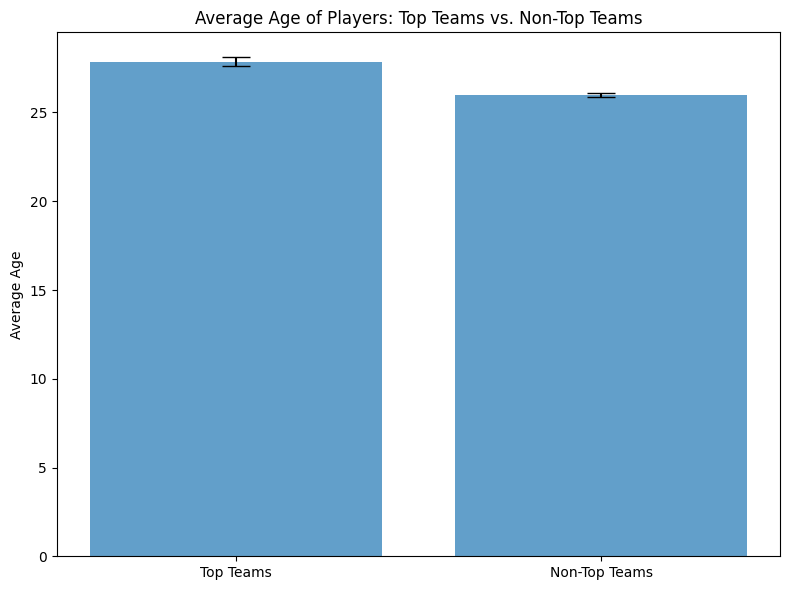

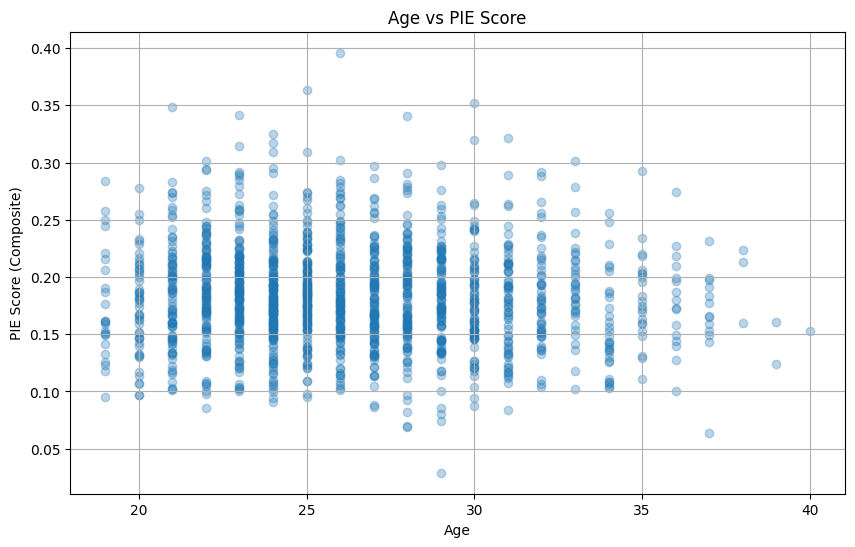

In [5]:
#next lets do some analysis on age! 
avgAge_topTeam_20 = top_teams_20["Age"].mean()
avgAge_topTeam = top_teams["Age"].mean()
avgAge_midTeam = mid_teams["Age"].mean()
avgAge_midTeam_20 = mid_teams_20["Age"].mean()
avgAge_botTeam = bottom_teams["Age"].mean()
avgAge_botTeam_20 = bottom_teams_20["Age"].mean()

print("Average Age for Top 4 Teams:")
print(f"{avgAge_topTeam:.2f} years")
print("\nAverage Age for Top 6 Teams (Team Performance 20):")
print(f"{avgAge_topTeam_20:.2f} years")
print("\nAverage Age for Average Teams:")
print(f"{avgAge_midTeam:.2f} years")
print("\nAverage Age for Average Teams (Team Performance 20):")
print(f"{avgAge_midTeam_20:.2f} years")
print("\nAverage Age for Bottom 4 Teams:")
print(f"{avgAge_botTeam:.2f} years")
print("\nAverage Age for Bottom 6 Teams (Team Performance 20):")
print(f"{avgAge_botTeam_20:.2f} years")

#use to perform ttest
ages_top_teams  = df[df['Is Top Team']]['Age']
ages_non_top_teams  = df[~df['Is Top Team']]['Age']

#ttest
t_stat_age, p_value_age = ttest_ind(ages_top_teams, ages_non_top_teams, equal_var=False)
print(f't-stat {t_stat_age} \n  p-value{p_value_age}')

#means + standard errors
mean_age_top_teams = ages_top_teams.mean()
mean_age_non_top_teams = ages_non_top_teams.mean()
se_age_top_teams = ages_top_teams.sem()
se_age_non_top_teams = ages_non_top_teams.sem()

#plot
plt.figure(figsize=(8, 6))
x_labels = ['Top Teams', 'Non-Top Teams']
means = [mean_age_top_teams, mean_age_non_top_teams]
ses = [se_age_top_teams, se_age_non_top_teams]

plt.bar(x_labels, means, yerr=ses, capsize=10, alpha=0.7)
plt.ylabel('Average Age')
plt.title(f'Average Age of Players: Top Teams vs. Non-Top Teams')

plt.savefig(f"visualization/descriptive_stats_visualized/t-test_age_vs_team_perf", bbox_inches='tight')  
plt.tight_layout()
plt.show()


pie_score_threshold = 1.0

# scatterplot for age and pie score 
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Composite'], alpha=0.3)

for index, row in df.iterrows():
    if row['Composite'] > pie_score_threshold:
        plt.annotate(row['Player'],  #annotating outliers 
                     (row['Age'], row['Composite']),
                     textcoords="offset points", 
                     xytext=(0,10), 
                     ha='center')  

plt.title('Age vs PIE Score')
plt.xlabel('Age')
plt.ylabel('PIE Score (Composite)')
plt.grid(True)
#plt.savefig(f"visualization/descriptive_stats_visualized/age_PIE_score", bbox_inches='tight')  
plt.show()

## Sixth Men Age and Team Performance

The data indicates a trend where the average age of sixth men increases with the team's performance, suggesting that more successful teams tend to rely on slightly older, and potentially more experienced, bench players. This would also explain why the PIE scores were lower. It is likely because the older players contributed less statistically but more with experience. Let's look at the PIE scores compared to the ages. 

In [6]:
#finding the totals for each position for different timeframes
Positions1999_2023 = df['Pos'].value_counts()
Positions1999_2010 = period1_df["Pos"].value_counts()
Positions2011_2023 = period2_df["Pos"].value_counts()

#Calculate the avg PIE score by position
avg_pie_by_position = df.groupby('Pos')['Composite'].mean()
avg_pie_by_position_1999_2010 = period1_df.groupby('Pos')['Composite'].mean()
avg_pie_by_position_2011_2023 = period2_df.groupby('Pos')['Composite'].mean()


print(f"Position Count 1999-2023 \n {Positions1999_2023}")
print(f"Position Count 1999-2010 \n {Positions1999_2010}")
print(f"Position Count 2010-2023 \n {Positions2011_2023}")

print("Average PIE Score by Position (1999-2023):")
print(avg_pie_by_position)
print("\nAverage PIE Score by Position (1999-2010):")
print(avg_pie_by_position_1999_2010)
print("\nAverage PIE Score by Position (2011-2023):")
print(avg_pie_by_position_2011_2023)

Position Count 1999-2023 
 Pos
SG    391
PF    294
PG    279
SF    276
C     188
Name: count, dtype: int64
Position Count 1999-2010 
 Pos
SG    177
SF    155
PF    148
PG    136
C      94
Name: count, dtype: int64
Position Count 2010-2023 
 Pos
SG    214
PF    146
PG    143
SF    121
C      94
Name: count, dtype: int64
Average PIE Score by Position (1999-2023):
Pos
C     0.198901
PF    0.193032
PG    0.189285
SF    0.169512
SG    0.172900
Name: Composite, dtype: float64

Average PIE Score by Position (1999-2010):
Pos
C     0.171524
PF    0.192803
PG    0.188324
SF    0.171606
SG    0.174113
Name: Composite, dtype: float64

Average PIE Score by Position (2011-2023):
Pos
C     0.226277
PF    0.193265
PG    0.190199
SF    0.166830
SG    0.171896
Name: Composite, dtype: float64


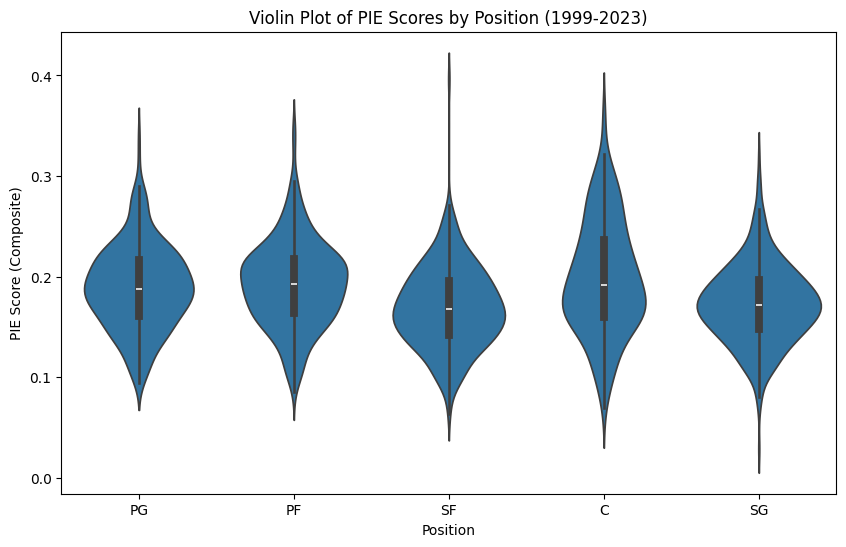

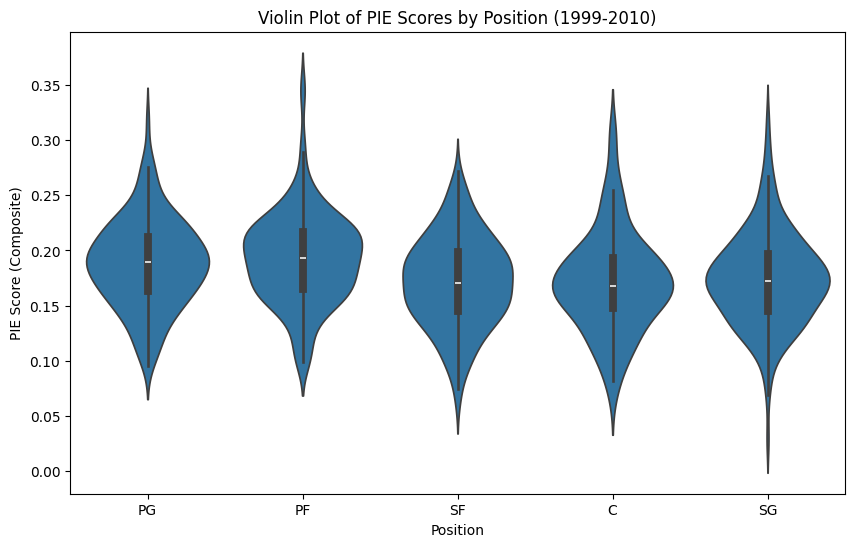

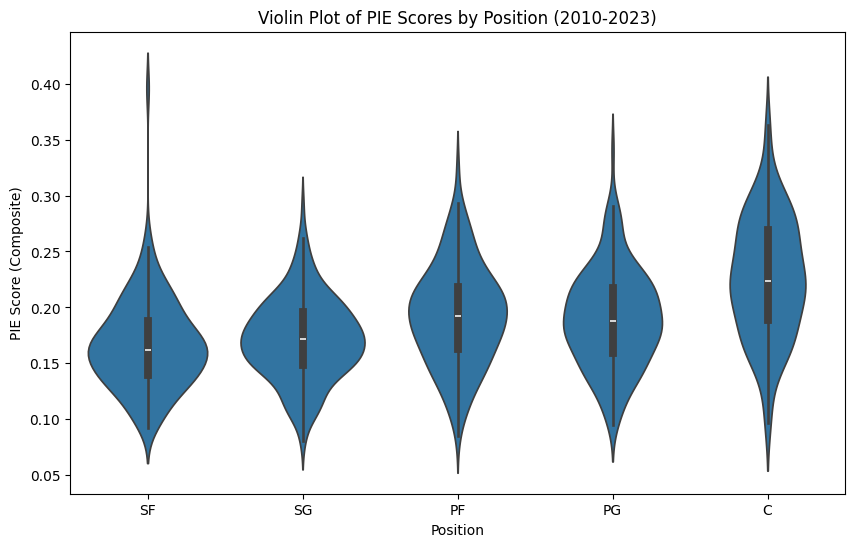

In [7]:
#heres a violin graph to visualize it!

# violin plot for the full period 1999-2023
plt.figure(figsize=(10, 6))
sns.violinplot(x='Pos', y='Composite', data=df)
plt.title('Violin Plot of PIE Scores by Position (1999-2023)')
plt.xlabel('Position')
plt.ylabel('PIE Score (Composite)')
#plt.savefig(f"visualization/descriptive_stats_visualized/position_pie_scores", bbox_inches='tight')  
plt.show()

#period 1 graph
plt.figure(figsize=(10, 6))
sns.violinplot(x='Pos', y='Composite', data=period1_df)
plt.title('Violin Plot of PIE Scores by Position (1999-2010)')
plt.xlabel('Position')
plt.ylabel('PIE Score (Composite)')
#plt.savefig(f"visualization/descriptive_stats_visualized/position_pie_scores_period1", bbox_inches='tight')  
plt.show()

#period 2 graph
plt.figure(figsize=(10, 6))
sns.violinplot(x='Pos', y='Composite', data=period2_df)
plt.title('Violin Plot of PIE Scores by Position (2010-2023)')
plt.xlabel('Position')
plt.ylabel('PIE Score (Composite)')
#plt.savefig(f"visualization/descriptive_stats_visualized/position_pie_scores_period2", bbox_inches='tight')  
plt.show()

## Positional Impact Analysis (1999-2023)

The observed shift in position counts over time, with shooting guards (SG) becoming increasingly prevalent and small forwards (SF) seeing a decline, likely reflects strategic changes in the NBA favoring versatility and three-point shooting efficiency, roles typically associated with SGs.

Centers have seen a marked increase in their average PIE scores from 1999-2010 to 2011-2023, suggesting their roles have grown in importance despite their lower presence on the court. Power forwards and point guards also show increased PIE scores, indicating their sustained or enhanced impact in games. Conversely, small forwards have experienced a slight decrease in PIE scores, potentially reflecting changes in their traditional roles or an overlap with shooting guards, who have remained relatively stable in their impact. The data suggests that as the NBA has evolved, so too has the contribution of each position, with a clear trend towards valuing efficiency and versatility.


Position Counts for Top 4 Teams:
Pos
SG    59
PG    42
PF    39
SF    30
C     18
Name: count, dtype: int64

Position Counts for Top 6 Teams (Team Performance 20):
Pos
SG    87
PG    61
PF    59
SF    48
C     24
Name: count, dtype: int64

Position Counts for Average Teams:
Pos
SG    281
SF    216
PF    211
PG    201
C     145
Name: count, dtype: int64

Position Counts for Average Teams (Team Performance 20):
Pos
SG    233
SF    179
PF    167
PG    165
C     125
Name: count, dtype: int64

Position Counts for Bottom 4 Teams:
Pos
SG    51
PF    44
PG    36
SF    30
C     25
Name: count, dtype: int64

Position Counts for Bottom 6 Teams (Team Performance 20):
Pos
SG    71
PF    68
PG    53
SF    49
C     39
Name: count, dtype: int64


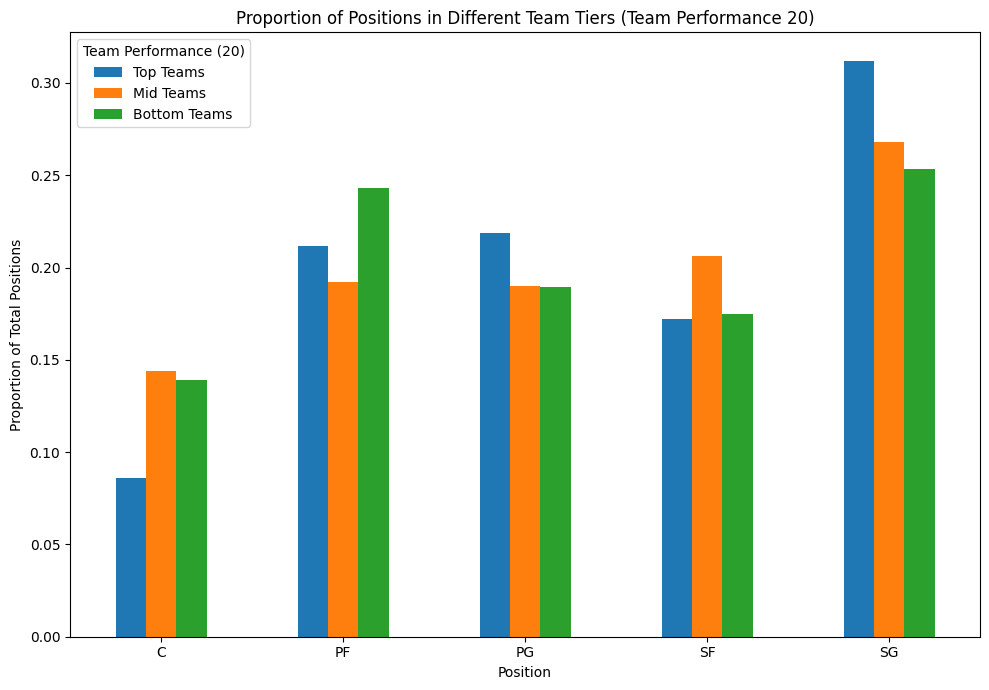

In [8]:
#calculating positions for top mid and bottom teams
topTeamPos_20 = top_teams_20["Pos"].value_counts()
topTeamPos = top_teams["Pos"].value_counts()
midTeamPos= mid_teams["Pos"].value_counts()
midteamPos20 = mid_teams_20["Pos"].value_counts()
botTeamPos = bottom_teams["Pos"].value_counts()
botTeamPos_20 = bottom_teams_20["Pos"].value_counts()

print("Position Counts for Top 4 Teams:")
print(topTeamPos)
print("\nPosition Counts for Top 6 Teams (Team Performance 20):")
print(topTeamPos_20)
print("\nPosition Counts for Average Teams:")
print(midTeamPos)
print("\nPosition Counts for Average Teams (Team Performance 20):")
print(midteamPos20)
print("\nPosition Counts for Bottom 4 Teams:")
print(botTeamPos)
print("\nPosition Counts for Bottom 6 Teams (Team Performance 20):")
print(botTeamPos_20)

pos_counts = pd.DataFrame({
    'Top Teams': topTeamPos_20,
    'Mid Teams': midteamPos20,
    'Bottom Teams': botTeamPos_20
})

#normalize
position_proportions_df = pos_counts.div(pos_counts.sum(axis=0), axis=1)

#bar graph
position_proportions_df.plot(kind='bar', figsize=(10, 7))
plt.title('Proportion of Positions in Different Team Tiers (Team Performance 20)')
plt.xlabel('Position')
plt.ylabel('Proportion of Total Positions')
plt.xticks(rotation=0)  #keep the position names horizontal
plt.legend(title='Team Performance (20)')
plt.tight_layout()
#plt.savefig(f"visualization/descriptive_stats_visualized/proportion_positions_in_teams", bbox_inches='tight')  
plt.show()

## Team Performance and Usage of Sixth Men at Different Positions
- SG are the most common sixth man position 
- Centers are the least utilized 
- One trend we see is that the second most common position top teams utilize as sixth men is point gaurds, while for average and bottom teams, the point gaurd is always the third or fourth most utilized. 
- in the visualization we can see this as the porportion of pg used was higher in top teams. We can see bottom teams utilized PF more, and one trend is top teams utilized centers the least. 


Another really cool trend we can see is that top teams have more offensive focused players while bottom teams have more defensive focused players. We can see this in this graph. 


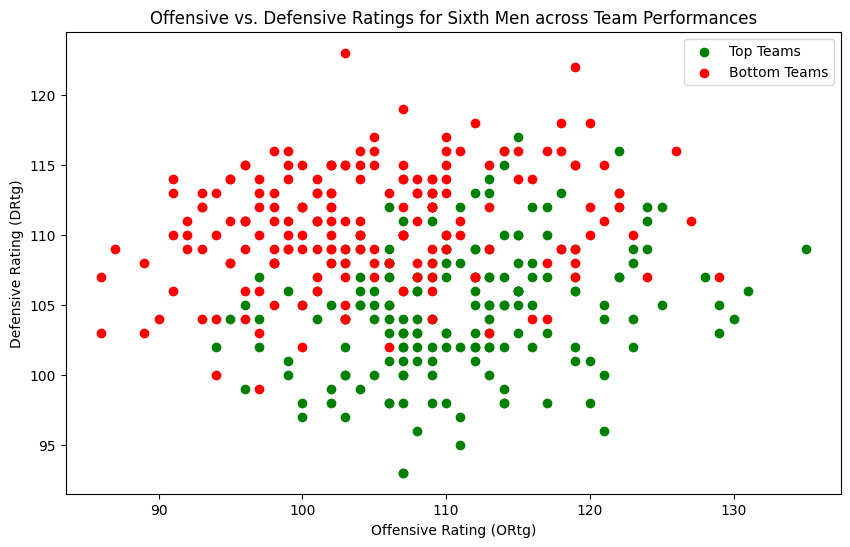

T-Statistic: 7.497648167155161, P-value: 5.069968797494106e-13


In [9]:
plt.figure(figsize=(10, 6))

#scatter plot for ortg and dtg for top teams and bottom teams
plt.scatter(top_teams['ORtg'], top_teams['DRtg'], color='green', label='Top Teams')
plt.scatter(bottom_teams['ORtg'], bottom_teams['DRtg'], color='red', label='Bottom Teams')

plt.title('Offensive vs. Defensive Ratings for Sixth Men across Team Performances')
plt.xlabel('Offensive Rating (ORtg)')
plt.ylabel('Defensive Rating (DRtg)')
plt.legend()
#plt.savefig(f"visualization/descriptive_stats_visualized/ortg_vs_drtg", bbox_inches='tight')  
plt.show()

#t-test
t_stat, p_value = ttest_ind(top_teams['ORtg'], bottom_teams['ORtg'], equal_var=False)

print(f"T-Statistic: {t_stat}, P-value: {p_value}")